In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
import seaborn as sns

In [54]:
mesures = pd.read_pickle('/home/nmpnguyen/conversion_model/comparaison/ipral_learned_TESTtarget_dataset.pkl')
predictes = pd.read_pickle('/home/nmpnguyen/conversion_model/comparaison/ipral_learned_TESTpredict_dataset.pkl')

In [55]:
mesures.shape, predictes.shape

((48326582, 1), (48326582, 1))

In [60]:
# data = pd.concat([mesures, predictes], axis=1)
# data = data.dropna(axis=0, how='any')
data.columns = ['mesures', 'predictes']
data

,mesures,predictes
0,0.000001,8.604668e-07
1,0.000003,2.801438e-06
2,0.001595,1.594850e-03
3,0.026318,2.631771e-02
4,0.040776,4.077606e-02
...,...,...
48326577,-5.033612,-5.033612e+00
48326578,-2.865921,-2.865921e+00
48326579,0.925452,9.254516e-01
48326580,-2.134492,-2.134492e+00


In [61]:
H = np.histogram2d(data['mesures'], data['predictes'], 
                   bins=[np.arange(0, 80, 0.1), np.arange(0, 80, 0.1)])
H

(array([[6.64361e+05, 3.54600e+03, 3.89700e+03, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [4.41200e+03, 4.65835e+05, 4.98400e+03, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [3.37300e+03, 4.32400e+03, 5.24995e+05, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.90000e+01,
         0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         2.10000e+01, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 2.30000e+01]]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
   

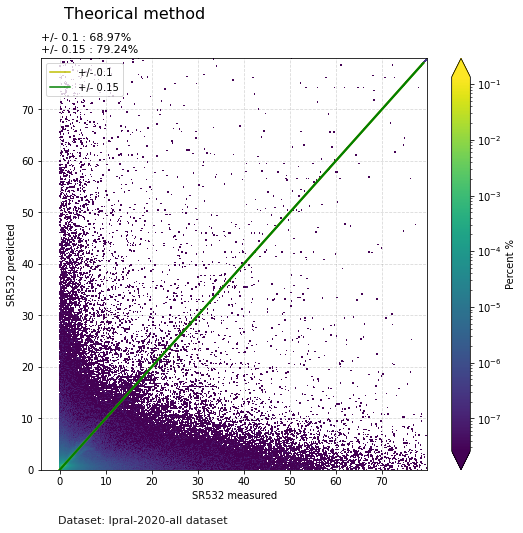

In [62]:

fig, ax = plt.subplots(figsize=(7.5,7.5))
p = ax.pcolormesh(H[1], H[2], (H[0]/np.sum(H[0])).T, norm=LogNorm())
plt.colorbar(p, ax=ax, extend='both', label='Percent %')
ax.plot(np.arange(0,80), np.arange(0,80), '-k')
ax.plot(np.arange(0,80)+0.1, np.arange(0,80), '-y', label='+/- 0.1')
ax.plot(np.arange(0,80)-0.1, np.arange(0,80), '-y')
ax.plot(np.arange(0,80)+0.1, np.arange(0,80), '-g', label='+/- 0.15')
ax.plot(np.arange(0,80)-0.1, np.arange(0,80), '-g')
ax.legend()
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
# TITLE
plt.suptitle('Theorical method', x=0.125, y=0.98, ha='left', fontsize=16)
# SUBTITLE
plt.title('+/- 0.1 : 68.97% \n+/- 0.15 : 79.24%', loc='left', fontsize=11)
# AXIS LABELS
plt.ylabel('SR532 predicted')
plt.xlabel('SR532 measured')
# CAPTION
plt.text(-0.5, -10.5, 'Dataset: Ipral-2020-all dataset', ha='left', 
         fontsize = 11, alpha=0.9)

plt.tight_layout()

(array([[374870., 371080., 486119., ...,      0.,      0.,      0.],
        [     0.,      0.,      0., ...,      0.,      0.,      0.],
        [     0.,      0.,      0., ...,      0.,      0.,      0.],
        ...,
        [     0.,      0.,      0., ...,      0.,      0.,      0.],
        [     0.,      0.,      0., ...,      0.,      0.,      0.],
        [     0.,      0.,      0., ...,      0.,      0.,      0.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18

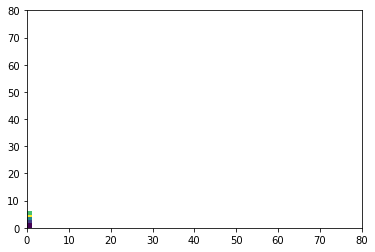

In [19]:
plt.hist2d(data['mesures'], data['predictes'], range=[[0,80], [0,80]], bins=80, norm=LogNorm())

In [66]:
from datetime import datetime

now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
now

'2022-08-17 00:24:33'